In [1]:
#!conda install "numpy>=2.0" "scipy>=1.12" seaborn --update-deps --yes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df_cogfy = pd.read_csv("cogfy-28.05.2025-evaluated.csv")
df_dify = pd.read_csv("dify-17.06.2025-evaluated.csv")

df_cogfy.shape, df_dify.shape

((79, 12), (79, 12))

In [4]:
df_dify

,pergunta,classe,resposta,response_dify,crit_1,crit_2,crit_3,crit_4,crit_5,crit_6,crit_7,crit_8
0,Quais serviços estão disponíveis nos balcões d...,Geral – Atendimento Presencial,A plataforma gov.br está com uma iniciativa de...,Olá! Sou o assistente do gov.br e estou aqui p...,10.0,10.0,8.0,10.0,10.0,10.0,10.0,9.0
1,Qual suporte vocês oferecem para problemas enc...,Geral - Problema em sistemas diversos,Escrevemos em atenção à sua solicitação para i...,Olá! Sou o assistente do gov.br e posso ajudar...,8.0,6.0,5.0,9.0,7.0,0.0,8.0,5.0
2,Como faço para obter um arquivo com o registro...,Geral - Arquivo da conversa no chat,"Para solicitar o arquivo com esta conversa, pe...",Olá! Sou o assistente do gov.br e posso te aju...,10.0,10.0,9.0,9.0,9.0,-1.0,8.0,10.0
3,Qual é o número de telefone para atendimento s...,Geral - Atendimento telefônico,Não há canal para atendimento telefônico sobre...,Olá! Eu sou o assistente do gov.br e posso te ...,10.0,10.0,9.0,8.0,10.0,10.0,9.0,9.0
4,Como posso deixar uma avaliação positiva sobre...,Geral - Elogios,Agradecemos o seu elogio! A equipe gov.br está...,Olá! Sou o assistente do gov.br e posso te aju...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
74,Como faço para acessar os serviços de Imposto ...,Nível insuficiente - Imposto de Renda,Os serviços de Imposto de Renda (https://www.g...,Olá! Eu sou o assistente digital do gov.br e p...,9.0,10.0,8.0,9.0,9.0,0.0,9.0,9.0
75,Como um MEI pode acessar e melhorar o nível da...,Nível insuficiente - MEI,Os serviços de MEI são prestados pela Receita ...,Olá! Eu sou o assistente oficial do gov.br e p...,9.0,9.0,8.0,7.0,8.0,7.0,7.0,9.0
76,Como posso acessar os serviços do Meu INSS se ...,Nível insuficiente - Meu INSS,Os serviços do Meu INSS (https://meu.inss.gov....,Olá! Eu sou o assistente do gov.br e posso te ...,9.0,10.0,9.0,8.0,8.0,-1.0,8.0,9.0
77,Como posso acessar e utilizar o sistema Regist...,Nível insuficiente - Registrato,O sistema Registrato (https://registrato.bcb.g...,"Olá! Sou o assistente oficial do gov.br, pront...",9.0,10.0,8.0,9.0,8.0,-1.0,8.0,9.0


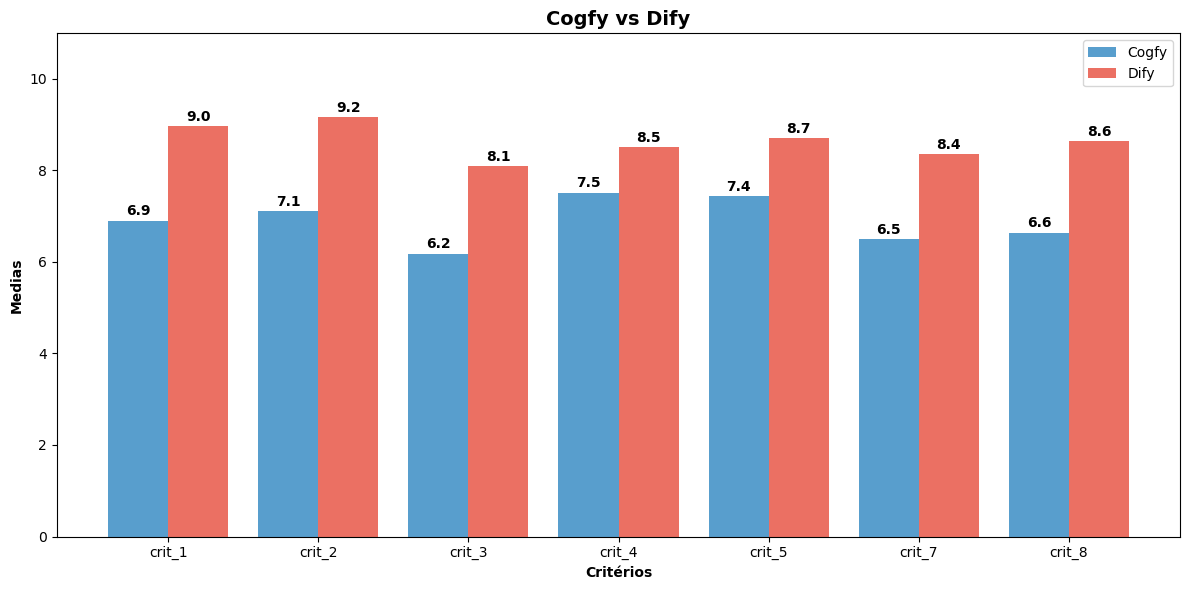

------------------------------------------------------------
Critério   Cogfy      Dify       Diferença   
------------------------------------------------------------
crit_1     6.90       8.96       -2.06       
crit_2     7.10       9.16       -2.05       
crit_3     6.18       8.09       -1.91       
crit_4     7.51       8.51       -1.00       
crit_5     7.43       8.70       -1.27       
crit_7     6.49       8.35       -1.86       
crit_8     6.63       8.64       -2.00       
------------------------------------------------------------


In [5]:
criteria_cols = [
    'crit_1',
    'crit_2',
    'crit_3',
    'crit_4',
    'crit_5',
#    'crit_6',
    'crit_7',
    'crit_8'
]

# Pega a media de cada um
cogfy_means = df_cogfy[criteria_cols].mean()
dify_means = df_dify[criteria_cols].mean()

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4
x_pos = np.arange(len(criteria_cols))

# Create the bars
bars1 = ax.bar(x_pos - bar_width/2, cogfy_means, bar_width, label='Cogfy', alpha=0.8, color='#2E86C1')
bars2 = ax.bar(x_pos + bar_width/2, dify_means, bar_width, label='Dify', alpha=0.8, color='#E74C3C')

ax.set_xlabel('Critérios', fontweight='bold')
ax.set_ylabel('Medias', fontweight='bold')
ax.set_title('Cogfy vs Dify', fontweight='bold', fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(criteria_cols)
ax.legend()

# Add value labels on top of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

add_value_labels(bars1)
add_value_labels(bars2)

# Set y-axis limits to better show the data
ax.set_ylim(0, max(max(cogfy_means), max(dify_means)) * 1.2)

plt.tight_layout()
plt.show()

print("-" * 60)
print(f"{'Critério':<10} {'Cogfy':<10} {'Dify':<10} {'Diferença':<12}")
print("-" * 60)

differences = cogfy_means - dify_means
for col in criteria_cols:
    cogfy_val = cogfy_means[col]
    dify_val = dify_means[col]
    diff_val = differences[col]
    print(f"{col:<10} {cogfy_val:<10.2f} {dify_val:<10.2f} {diff_val:<12.2f}")
print("-" * 60)

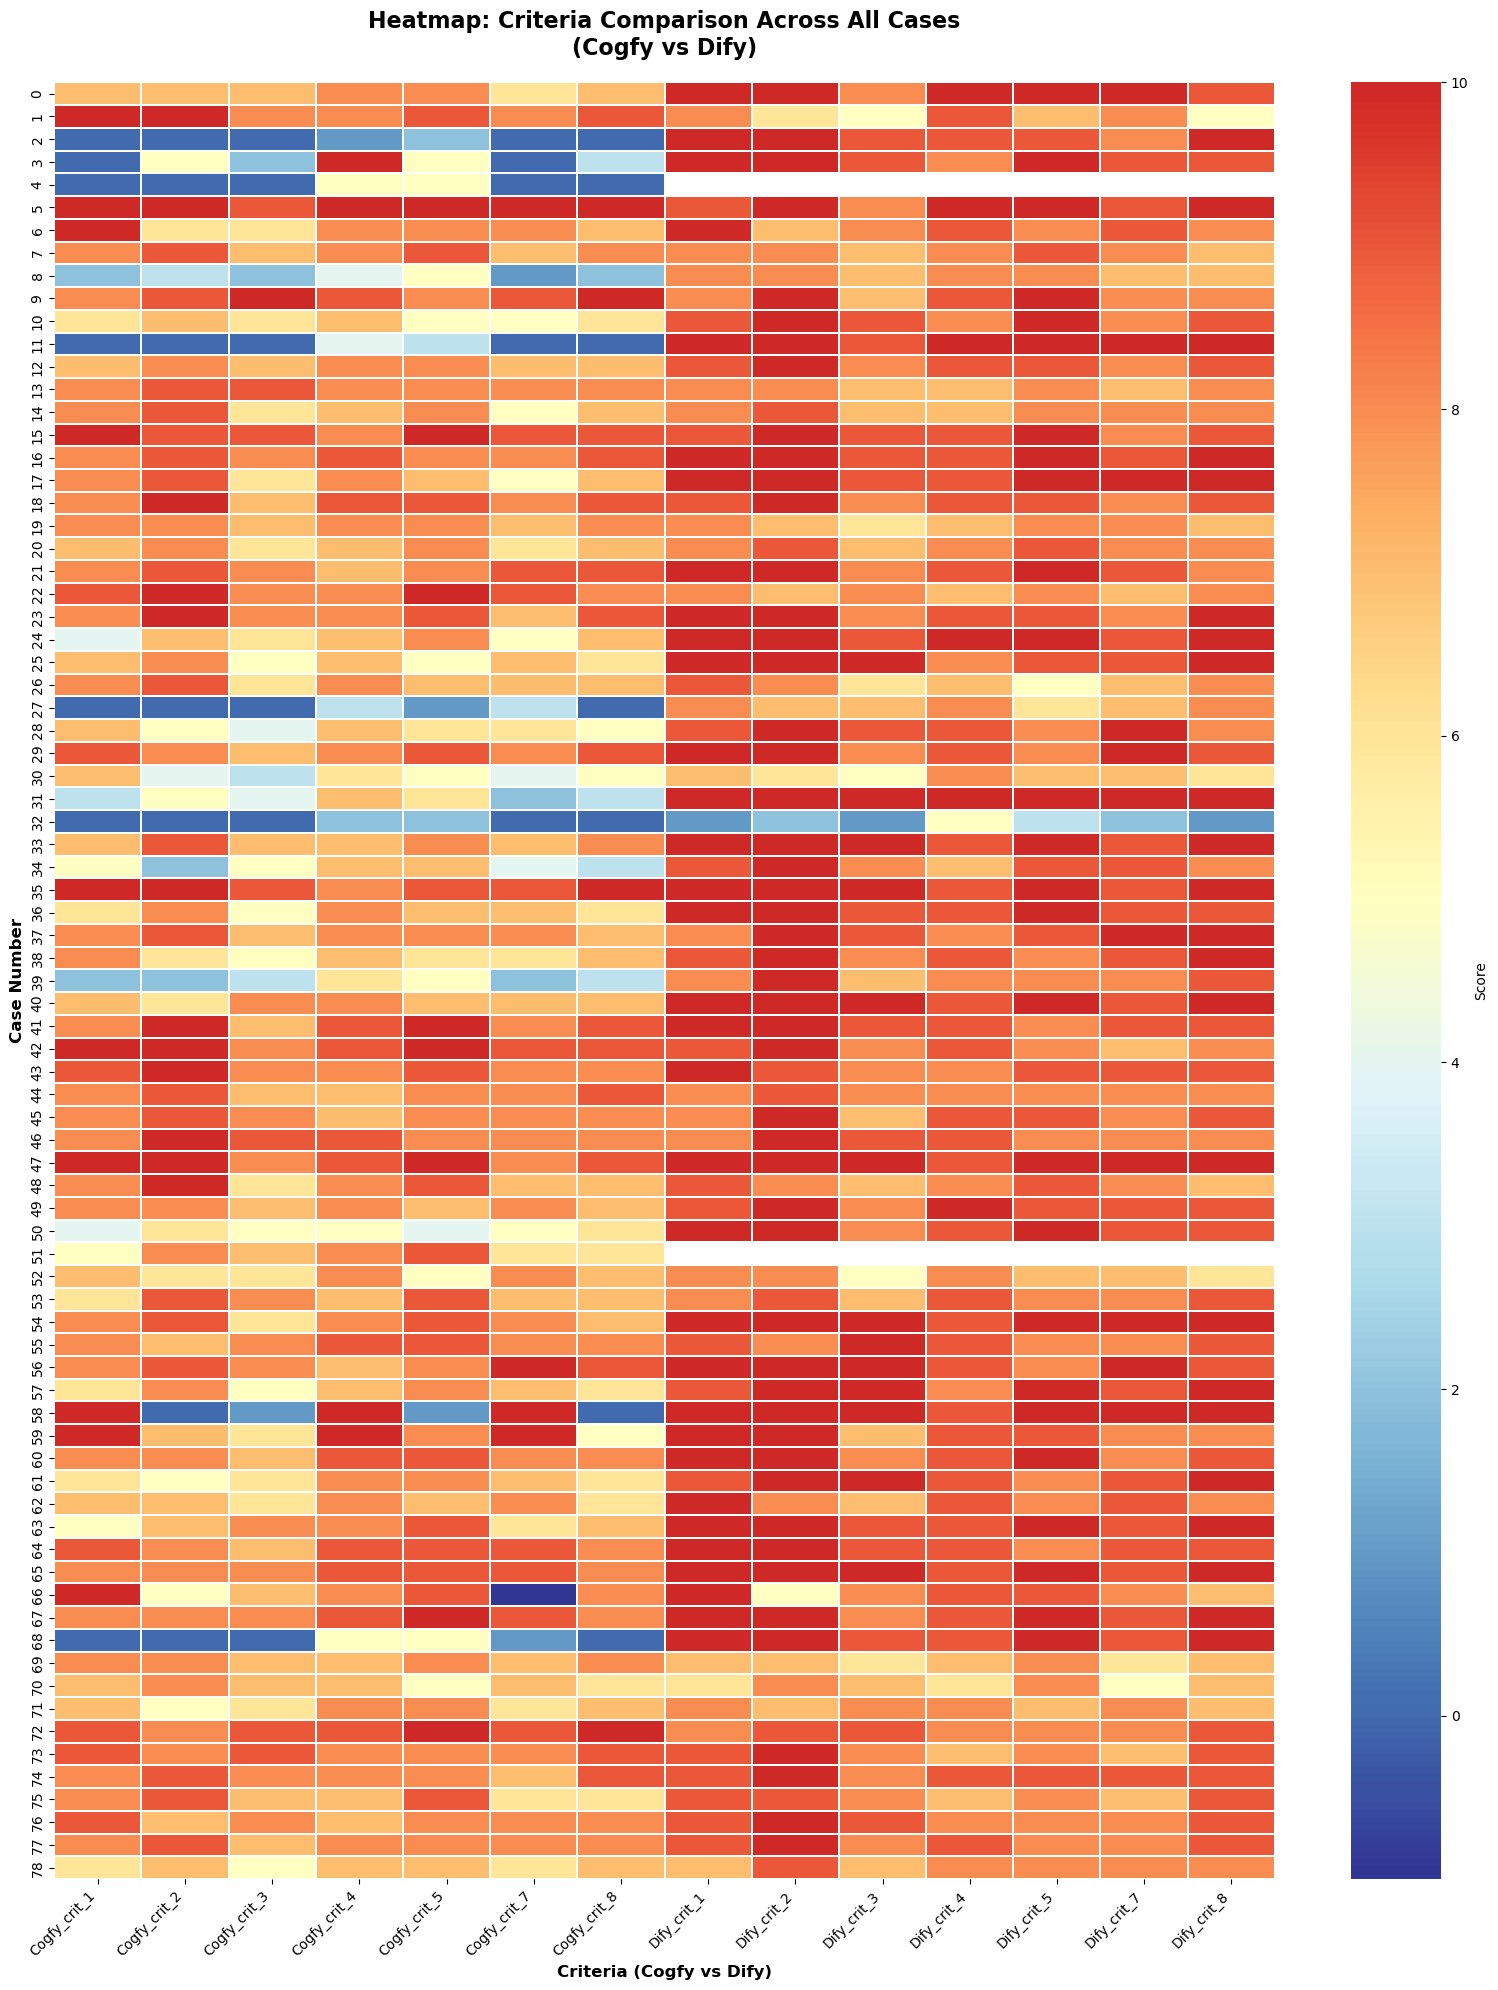

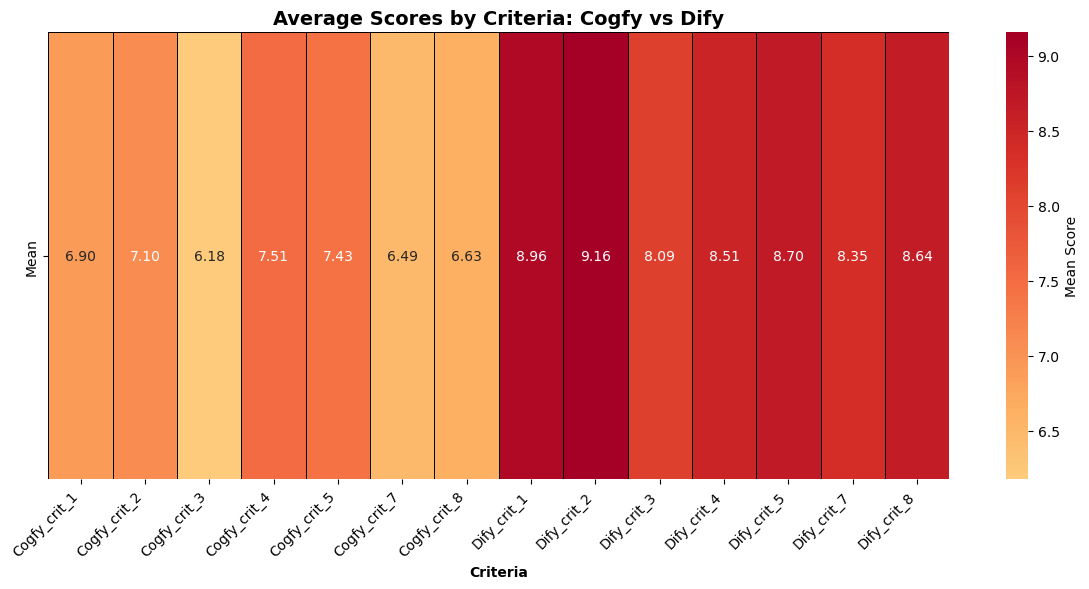

Heatmap Analysis Summary:
Total cases analyzed: 79
Total criteria compared: 7 × 2 = 14
Heatmap dimensions: 79 rows × 14 columns

Data range: -1.0 to 10.0

System Performance Overview:
------------------------------
Cogfy overall average: 6.89
Dify overall average: 8.63
Difference (Dify - Cogfy): 1.74


In [6]:
cogfy_criteria = df_cogfy[criteria_cols].copy()
dify_criteria = df_dify[criteria_cols].copy()

# Rename columns
cogfy_criteria.columns = [f'Cogfy_{col}' for col in criteria_cols]
dify_criteria.columns = [f'Dify_{col}' for col in criteria_cols]

# Combine dataframes
combined_criteria = pd.concat([cogfy_criteria, dify_criteria], axis=1)

# Create the heatmap
plt.figure(figsize=(16, 20))

# Create heatmap with custom colormap
heatmap = sns.heatmap(combined_criteria, 
                      cmap='RdYlBu_r',  # Red-Yellow-Blue reversed (red=high, blue=low)
                      center=5,  # Center the colormap around 5 (assuming 1-10 scale)
                      annot=False,  # Don't show values (too many to read)
                      cbar_kws={'label': 'Score'},
                      linewidths=0.1,
                      linecolor='white')

# Customize the plot
plt.title('Heatmap: Criteria Comparison Across All Cases\n(Cogfy vs Dify)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Criteria (Cogfy vs Dify)', fontweight='bold', fontsize=12)
plt.ylabel('Case Number', fontweight='bold', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Create a summary comparison heatmap (average by criteria)
plt.figure(figsize=(12, 6))

# Calculate means for better overview
means_data = combined_criteria.mean().values.reshape(1, -1)
means_df = pd.DataFrame(means_data, columns=combined_criteria.columns, index=['Mean'])

# Create summary heatmap
sns.heatmap(means_df, 
            cmap='RdYlBu_r',
            center=5,
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Mean Score'},
            linewidths=0.5,
            linecolor='black')

plt.title('Average Scores by Criteria: Cogfy vs Dify', fontsize=14, fontweight='bold')
plt.xlabel('Criteria', fontweight='bold')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print some insights
print("Heatmap Analysis Summary:")
print("=" * 50)
print(f"Total cases analyzed: {len(combined_criteria)}")
print(f"Total criteria compared: {len(criteria_cols)} × 2 = {len(combined_criteria.columns)}")
print(f"Heatmap dimensions: {len(combined_criteria)} rows × {len(combined_criteria.columns)} columns")

print(f"\nData range: {combined_criteria.min().min():.1f} to {combined_criteria.max().max():.1f}")

# Show statistics for each system
print("\nSystem Performance Overview:")
print("-" * 30)
cogfy_avg = cogfy_criteria.mean().mean()
dify_avg = dify_criteria.mean().mean()
print(f"Cogfy overall average: {cogfy_avg:.2f}")
print(f"Dify overall average: {dify_avg:.2f}")
print(f"Difference (Dify - Cogfy): {dify_avg - cogfy_avg:.2f}")